<a href="https://colab.research.google.com/github/ngtinc21/Machine-Learning-Algorithms/blob/main/RNN_Example_1_Animal_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification: Dogs, Cats, and Pandas**


## **Data Preprocessing**

#### Data Acquisition

fatal: destination path 'Dog-Cat-Panda_Images' already exists and is not an empty directory.


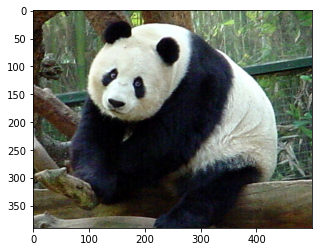

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 

# Download the dataset
! git clone https://github.com/PrefaceCoding/Dog-Cat-Panda_Images

# Import the os package, from which, load in the listdir function
from os import listdir

# Create an empty list, filenames
filenames = []

# Add the name of each image in the animals/animals folder into the filenames list, 
k="Dog-Cat-Panda_Images/animals/animals"
for file1 in listdir(k): 
    file2 = k+"/"+file1
    for file3 in listdir(file2):
        filenames.append(file3)

# Randomly take out a filename
sample = np.random.choice(filenames)

# Use interpolation to link to the directory
category = sample.split("_")[0]

# Show the image
from keras.preprocessing.image import load_img
img = load_img(f"Dog-Cat-Panda_Images/animals/animals/{category}/{sample}")
plt.imshow(img)

In [ ]:
# In the keras.preprocessing.image package, load in the functions load_img and img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# Create two empty lists, x and y
x=[]
y=[]

# Load each image in the animals/animals folder using a for loop
# Using the load_img and img_to_array functions, load all the images into a list x
# and add the corresponding classification into list y

from skimage import color
from skimage import io
import cv2
k="Dog-Cat-Panda_Images/animals/animals"
for file1 in listdir(k):
    file2=k+"/"+file1
    for file3 in listdir(file2):
        file4=file2+"/"+file3

        # Set all input image to have the same shape (108*108), and to be grayscale too
        img = load_img(file4, color_mode='grayscale',target_size=(28,28))  
        img_array = img_to_array(img)
        x.append(img_array)
        y.append(file1)

# Check the length of both lists to ensure they are both the same length
len(x),len(y), type(x[0])

(3000, 3000, numpy.ndarray)

In [ ]:
img_array.shape

(28, 28, 1)

#### Data Preprocessing

In [ ]:
# Normalise the values of the pixel by redefining them as a numpy array from a range 0:255 to 0:1
x = np.array(x)/255

# Now check the shape of the variable
# x should have a shape of (3000, 108, 108, 3), signifying 3000 images, of 108x108 with 3 RGB layers
print(x.shape)

(3000, 28, 28, 1)


In [ ]:
# Transform the data by redefining them as a numpy array
y = np.array(y)

# Now check the shape of the variable
# y should have a shape of (3000,), signifying 3000 labels
print(y.shape)

(3000,)


In [ ]:
# Apply the LabelEncoder function for the classification list
# Encode target labels with value between 0 and n_classes-1, in which n_classes = 3 in this case
# The transformer should be used to encode target values, i.e. y, and not the input X.
# Import the function
from sklearn.preprocessing import LabelEncoder

# Set a variable to initialise the function
k = LabelEncoder()

# Use the .fit_transform method from the function, and fit to the data y, then transform it
y= k.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# Import the to_categorical function from the keras.utils package
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Redefine y by classifying the class vector (integers) as a binary class matrix
y = to_categorical(y)
y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
y.shape

(3000, 3)

In [ ]:
# pip list

In [ ]:
x.shape

(3000, 28, 28, 1)

## **1. Image Classification By SimpleRNN**

#### Model Building and training

In [ ]:
# Split x and y into a using a 1/3 split
# Select a fix dataset from random_state = 0 for easy illustration
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Import a model and the relevant libraries for RNN
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, SimpleRNN

import time
start = time.time()
# Define function for a SimpleRNN model
def SimpleRNN_model(hidden_units, dense_units, input_shape, activation):
    # Instanstiation
    model = Sequential()

    # SimpleRNN layer
    model.add(SimpleRNN(units = hidden_units, input_shape=input_shape, activation=activation[0]
                        ,dropout=0.2
                        # ,recurrent_dropout=0.0
                        # ,return_sequences=False
                        # ,return_state=False
                        # ,go_backwards=False
                        )) 
    # # The 2nd, 3rd, and 4th SimpleRNN layer 
    # # Deep Vertical RNNs (Seq2Seq modelling), mainly for language translation, entity tagging, speech recognition — kind of applications where having a sequence as input and output.
    # model.add(SimpleRNN(units = hidden_units, return_sequences = True))
    # model.add(SimpleRNN(units = hidden_units, return_sequences = True))
    # model.add(SimpleRNN(units = hidden_units, return_sequences = False))

    # Dense layer
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


model = SimpleRNN_model(hidden_units=16, dense_units=3, input_shape=(28,28), activation=['tanh', 'softmax'])
# Show tht number of parameters in each layer
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_15 (SimpleRNN)   (None, 16)                720       
                                                                 
 dense_16 (Dense)            (None, 3)                 51        
                                                                 
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Import the SGD function - gradient descent (with momentum) optimizer from keras.optimizers 
# Call the function with learning rate = 0.01, and momentum = 0.9
# opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
opt = keras.optimizers.Adam()

# Compile the model, with the SGD variable as the optimizer, and the appropriate loss, and metrics
model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=["accuracy"])  

In [ ]:
# Set up the early stopping for the training to prevent overfitting
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5, restore_best_weights=True)

In [ ]:
# Fitting the ANN to the dataset
history = model.fit(x_train,y_train,batch_size=8, validation_data=(x_test,y_test), epochs=25, callbacks=[early_stopping], verbose=2)  # if the accuracy is decreasing, it is a signal of overfitting!

Epoch 1/25
263/263 - 3s - loss: 1.1205 - accuracy: 0.3871 - val_loss: 1.0402 - val_accuracy: 0.4389 - 3s/epoch - 12ms/step
Epoch 2/25
263/263 - 2s - loss: 1.0403 - accuracy: 0.4538 - val_loss: 1.0185 - val_accuracy: 0.4667 - 2s/epoch - 7ms/step
Epoch 3/25
263/263 - 2s - loss: 1.0191 - accuracy: 0.4576 - val_loss: 1.0153 - val_accuracy: 0.4711 - 2s/epoch - 7ms/step
Epoch 4/25
263/263 - 2s - loss: 1.0172 - accuracy: 0.4724 - val_loss: 1.0019 - val_accuracy: 0.4822 - 2s/epoch - 7ms/step
Epoch 5/25
263/263 - 2s - loss: 0.9999 - accuracy: 0.4890 - val_loss: 1.0144 - val_accuracy: 0.4600 - 2s/epoch - 7ms/step
Epoch 6/25
263/263 - 2s - loss: 0.9953 - accuracy: 0.4829 - val_loss: 1.0128 - val_accuracy: 0.4700 - 2s/epoch - 7ms/step
Epoch 7/25
263/263 - 2s - loss: 1.0039 - accuracy: 0.4719 - val_loss: 1.0123 - val_accuracy: 0.4611 - 2s/epoch - 7ms/step
Epoch 8/25
263/263 - 2s - loss: 0.9975 - accuracy: 0.4781 - val_loss: 1.0055 - val_accuracy: 0.4589 - 2s/epoch - 7ms/step
Epoch 9/25
263/263 - 2s

#### Model Prediction

In [ ]:
# Prediction (Verify)
# Import the softmax layer
from keras.layers import Softmax

# Import the Sequential model
from keras.models import Sequential

# Generate the prediction model
prediction_model = Sequential([model,Softmax()])

# Prepare the verify test images located in the /images folder
# Add it into two new lists
x_verify=[]
y_verify=[]
k="Dog-Cat-Panda_Images/images"
for file in listdir(k):
  filename = k+"/"+file
  image = load_img(filename, color_mode='grayscale',target_size=(28,28))
  img_array = img_to_array(image)
  x_verify.append(img_array)
  y_verify.append(file.split(".")[0])

# Using the model, make a prediction onto sample images in the /images folder ( normalise the sample images first)
x_verify = np.array(x_verify)
prediction_verify = prediction_model.predict(x_verify)

In [ ]:
# Generate the predicted output and the actual label with a series of print statements
for num,predict in enumerate(prediction_verify):
  index = np.argmax(predict)
  if index == 0:
    index = "cats"
  elif index == 1:
    index = "dogs"
  else:
    index = "panda"
print(f"prediction : {index}\n")
print(f"actual label : {y_verify[num]}\n")

prediction : dogs

actual label : dog



In [ ]:
# Prediction (dataset)
# Use the prediction model to make a prediction (may take a couple minutes)
prediction = model.predict(np.array(x_test))

In [ ]:
# Take a random prediction, and compare the predicted label to the actual label in the y_test list
random = np.random.randint(0,len(np.array(x_test)))

predict = np.argmax(prediction[random])
if predict == 0:
  predict = "cats"
elif predict == 1:
  predict = "dogs"
else:
  predict = "panda"

print(f"prediction : {predict}")
print(f'matrix : {prediction[random]}')
print(f"actual label : {y_test[random]}")


prediction : dogs
matrix : [0.3208004  0.49389994 0.18529972]
actual label : [0. 1. 0.]


#### Model Evaluation

In [ ]:
# Evaluate the accuracy of the model
loss, acc = model.evaluate(x_test,y_test, verbose=0)
end = time.time()
elapse_time = end - start
print(f"The accuracy of the simple RNN model is {acc*100:0.1f}%, with training time {np.floor(elapse_time/60)} minutes and {elapse_time%60:0.0f} seconds.")


The accuracy of the simple RNN model is 48.2%, with training time 0.0 minutes and 18 seconds.


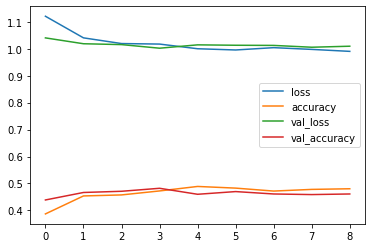

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.plot()

## **Image Classificatoin By LSTM**


#### Model Building and Training

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/12
263/263 [==============================] - 7s 16ms/step - loss: 1.0635 - accuracy: 0.4095 - val_loss: 1.0296 - val_accuracy: 0.4689
Epoch 2/12
263/263 [==============================] - 4s 14ms/step - loss: 0.9915 - accuracy: 0.4857 - val_loss: 0.9850 - val_accuracy: 0.4544
Epoch 3/12
263/263 [==============================] - 4s 15ms/step - loss: 0.9314 - accuracy: 0.5176 - val_loss: 0.9521 - val_accuracy: 0.5333
Epoch 4/12
263/263 [==============================] - 4s 14ms/step - loss: 0.8892 - accuracy: 0.5419 - val_loss: 0.9194 - val_accuracy: 0.5156
Epoch 5/12
263/263 [==============================] - 4s 14ms/step - loss: 0.8656 - accuracy: 0.5571 - val_loss: 0.9018 - val_accuracy: 0.5556
Epoch 6/12
263/263 [==============================] - 4s 14ms/step - loss: 0.8609 - accuracy: 0.5538 - val_loss: 0.8832 - val_accuracy: 0.5600
Epoch 7/12
263/263 [==============================] - 4s 14ms/step - loss: 0.8358 - accuracy: 0.5729 - val_loss: 0.8853 - val_accuracy: 0.5444

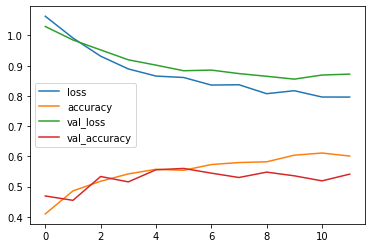

In [ ]:
from keras.layers import LSTM, Dropout
def LSTM_model(x_train ,y_train, x_test, y_test):
  start_time = time.time()

  model2 = Sequential()

  # First LSTM layer with Dropout regularisation
  model2.add(LSTM(units=16
                  # , return_sequences=True
                  , input_shape=(28,28)))
  model2.add(Dropout(0.2))
  # # Second LSTM layer
  # model2.add(LSTM(units=100, return_sequences=True))
  # model2.add(Dropout(0.2))
  # # Third LSTM layer
  # model2.add(LSTM(units=100, return_sequences=True))
  # model2.add(Dropout(0.2))
  # # Fourth LSTM layer
  # model2.add(LSTM(units=100))
  # model2.add(Dropout(0.2))
  # The output layer
  model2.add(Dense(units=3, activation='softmax'))

  # Compiling the RNN
  opt = keras.optimizers.Adam(lr=0.001)
  model2.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
  early_stopping = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=5, restore_best_weights=True)
  history_LSTM = model2.fit(x_train,y_train, batch_size=8, validation_data=(x_test,y_test),epochs=12,verbose=1, callbacks=[early_stopping])
  loss, acc = model2.evaluate(x_test, y_test, verbose=0)
  end_time = time.time()
  return acc, pd.DataFrame(history_LSTM.history), end_time - start_time
LSTM_acc, LSTM_plot, LSTM_elapse_time = LSTM_model(x_train ,y_train, x_test, y_test)
LSTM_plot.plot()
print(f"The accuracy of LSTM model is {LSTM_acc*100:0.1f}%, with training time {np.floor(LSTM_elapse_time/60)} minutes and {LSTM_elapse_time%60:0.0f} seconds.")


In [ ]:
# # Size of the output figure
# plt.figure(figsize=(17,8))

# # Show the prediction results of 16 sample images
# for i in range(16):
#     plt.subplot(4,8,2*i+1)
#     plt.xticks([])
#     plt.yticks([])
#     if np.argmax(prediction[i]) == np.argmax(y_test[i]):
#         color = 'blue'
#     else:
#         color = 'red'
#     plt.imshow(x_test[i], cmap=plt.get_cmap(name = 'gray'), vmin=0, vmax=255)
#     plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(prediction[i])],
#                                 100*np.max(prediction[i]),
#                                 class_names[np.argmax(y_test[i])]),
#                                 color=color)
#     plt.subplot(4,8,2*i+2)
#     plt.xticks(range(10))
#     plt.yticks([])
#     thisplot = plt.bar(range(3), prediction[i], color="grey")
#     plt.ylim([0, 1])  

#     thisplot[np.argmax(prediction[i])].set_color('red')
#     thisplot[np.argmax(y_test[i])].set_color('blue')
    
# plt.show()